In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, LeakyReLU


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load datasets
sentiment_df =  pd.read_csv("/content/drive/MyDrive/Project/Stock_Market/df1.csv")
stock_prices_df = pd.read_csv("/content/drive/MyDrive/Project/Stock_Market/stock_prices.csv")

In [5]:
# Convert Date column to datetime format
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.date
stock_prices_df['Date'] = pd.to_datetime(stock_prices_df['Date']).dt.date

# Merge datasets on Date and Stock Name
merged_df = pd.merge(stock_prices_df, sentiment_df, on=['Date', 'Stock Name'], how='left')

# Fill missing sentiment values with neutral (1)
merged_df['Sentiment_Label'].fillna(1, inplace=True)

<ipython-input-5-af4f7c2b49ed>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stock_prices_df['Date'] = pd.to_datetime(stock_prices_df['Date']).dt.date
<ipython-input-5-af4f7c2b49ed>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Sentiment_Label'].fillna(1, inplace=True)


In [6]:
# Display first few rows of merged data
print("Merged Data Preview:")
print(merged_df.head(1000))

Merged Data Preview:
           Date        Open        High         Low       Close   Adj Close  \
0    2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
1    2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2    2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
3    2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
4    2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
..          ...         ...         ...         ...         ...         ...   
995  2021-10-14  271.829987  273.416656  271.116669  272.773346  272.773346   
996  2021-10-14  271.829987  273.416656  271.116669  272.773346  272.773346   
997  2021-10-14  271.829987  273.416656  271.116669  272.773346  272.773346   
998  2021-10-14  271.829987  273.416656  271.116669  272.773346  272.773346   
999  2021-10-14  271.829987  273.416656  271.116669  272.773346  272.773346   

       Volume Stock Name      

In [7]:
# Selecting relevant features
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment_Label']
target = 'Close'

# Splitting dataset into training and testing sets
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Performance:
MAE: 0.11543130210148918
MSE: 0.4992318384733032
RMSE: 0.7065634001795615



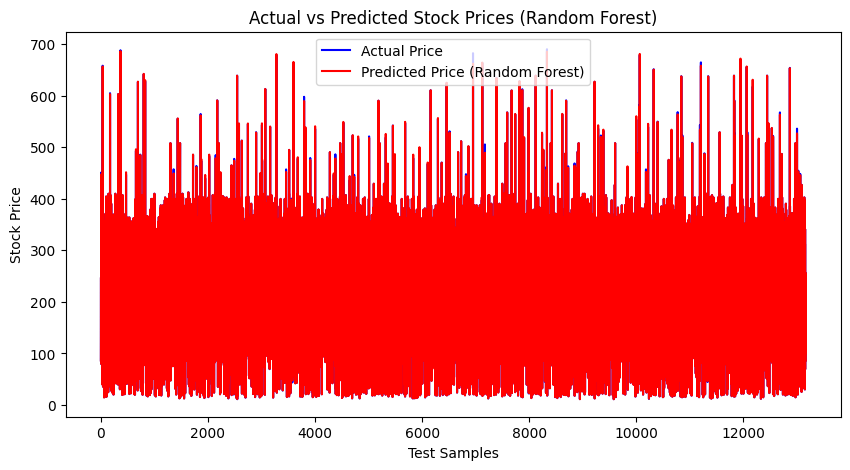

Linear Regression Performance:
MAE: 2.315434731647175
MSE: 12.037588722347735
RMSE: 3.469522837847841



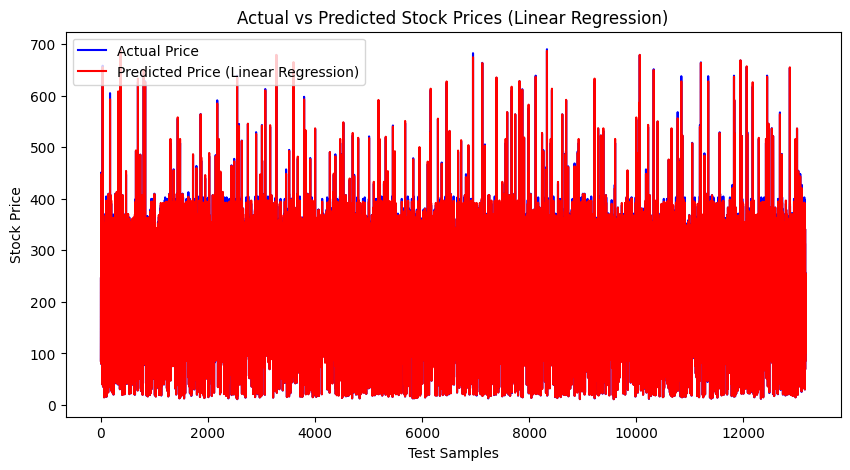

Support Vector Regressor Performance:
MAE: 3.7546115574042442
MSE: 148.88382032208088
RMSE: 12.201795782673994



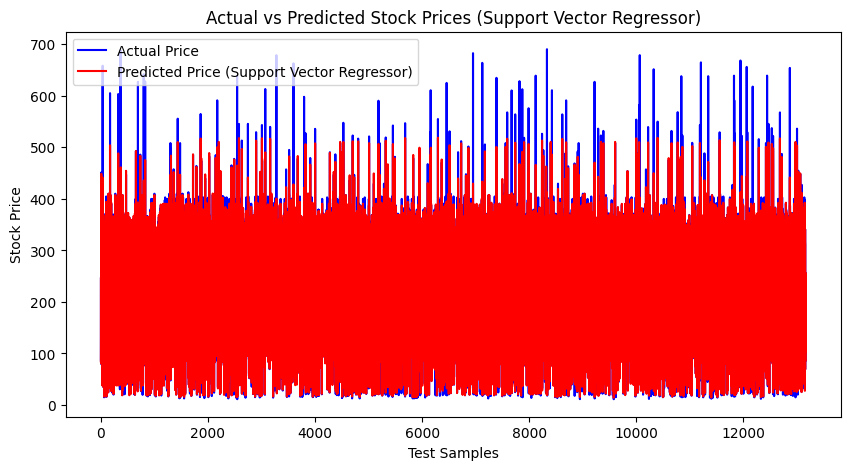

In [8]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(kernel='rbf')
}
# Train and evaluate models
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}
    predictions[name] = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})

    print(f"{name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(10,5))
    plt.plot(y_test.values, label='Actual Price', color='blue')
    plt.plot(y_pred, label=f'Predicted Price ({name})', color='red')
    plt.xlabel('Test Samples')
    plt.ylabel('Stock Price')
    plt.title(f'Actual vs Predicted Stock Prices ({name})')
    plt.legend()
    plt.show()

In [9]:
# Prepare data for LSTM
X_lstm = np.array(X).reshape((X.shape[0], X.shape[1], 1))
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

In [10]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile and train LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=16, verbose=1)

# Predict with LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)


Epoch 1/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 10934.0430
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 59.7764
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 50.0368
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 41.3774
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 38.6800
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 39.4693
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 39.5637
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 43.1466
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 38.1078
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - loss: 50.1696
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


LSTM Performance:
MAE: 4.758048521789494
MSE: 72.09598198620245
RMSE: 8.490935283359686



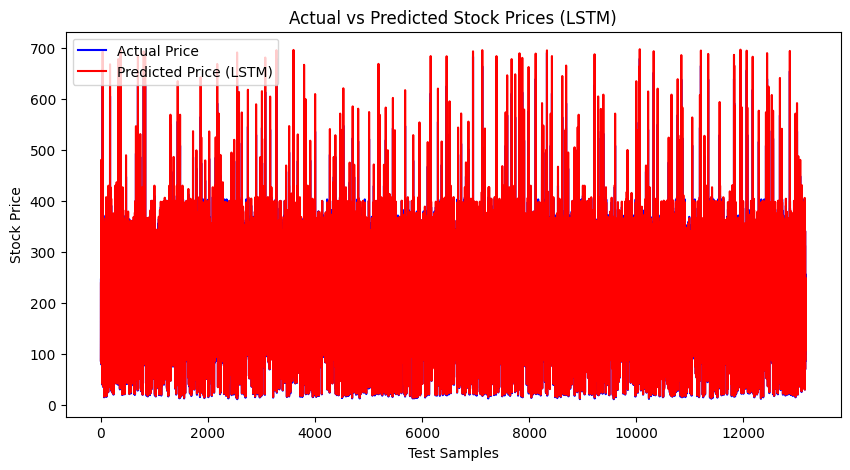

In [12]:
# Store LSTM results
results["LSTM"] = {"MAE": mae_lstm, "MSE": mse_lstm, "RMSE": rmse_lstm}
predictions["LSTM"] = pd.DataFrame({"Actual": y_test_lstm.values, "Predicted": y_pred_lstm.flatten()})

print(f"LSTM Performance:")
print(f"MAE: {mae_lstm}")
print(f"MSE: {mse_lstm}")
print(f"RMSE: {rmse_lstm}\n")

# Plot LSTM results
plt.figure(figsize=(10,5))
plt.plot(y_test_lstm.values, label='Actual Price', color='blue')
plt.plot(y_pred_lstm, label='Predicted Price (LSTM)', color='red')
plt.xlabel('Test Samples')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices (LSTM)')
plt.legend()
plt.show()

In [13]:
# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                               MAE         MSE       RMSE
Random Forest             0.115431    0.499232   0.706563
Linear Regression         2.315435   12.037589   3.469523
Support Vector Regressor  3.754612  148.883820  12.201796
LSTM                      4.758049   72.095982   8.490935


In [14]:

# Display actual vs predicted DataFrames for each model
for name, df in predictions.items():
    print(f"\nActual vs Predicted for {name}:")
    print(df.head())


Actual vs Predicted for Random Forest:
       Actual   Predicted
0   86.510002   86.510002
1  233.070007  233.070007
2  247.500000  247.500000
3  138.149994  138.149994
4  155.610001  155.610001

Actual vs Predicted for Linear Regression:
       Actual   Predicted
0   86.510002   85.565366
1  233.070007  232.194114
2  247.500000  247.478191
3  138.149994  138.828131
4  155.610001  155.436503

Actual vs Predicted for Support Vector Regressor:
       Actual   Predicted
0   86.510002   84.491833
1  233.070007  232.963399
2  247.500000  247.468926
3  138.149994  139.042249
4  155.610001  154.684300

Actual vs Predicted for LSTM:
       Actual   Predicted
0   86.510002   87.870552
1  233.070007  228.706131
2  247.500000  240.312866
3  138.149994  140.048264
4  155.610001  155.469818


In [15]:
# Build GAN model
def build_generator():
    generator = Sequential([
        Dense(50, activation=LeakyReLU(alpha=0.2), input_dim=X_train_scaled.shape[1]),
        Dense(100, activation=LeakyReLU(alpha=0.2)),
        Dense(X_train_scaled.shape[1], activation='tanh')
    ])
    return generator


In [16]:
def build_discriminator():
    discriminator = Sequential([
        Dense(50, activation=LeakyReLU(alpha=0.2), input_dim=X_train_scaled.shape[1]),
        Dense(100, activation=LeakyReLU(alpha=0.2)),
        Dense(1, activation='sigmoid')
    ])
    return discriminator


In [17]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False

z = Input(shape=(X_train_scaled.shape[1],))
generated_stock = generator(z)
validity = discriminator(generated_stock)

gan = Model(z, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Train GAN
def train_gan(epochs=1000, batch_size=32):
    for epoch in range(epochs):
        idx = np.random.randint(0, X_train_scaled.shape[0], batch_size)
        real_data = X_train_scaled[idx]
        noise = np.random.normal(0, 1, (batch_size, X_train_scaled.shape[1]))
        generated_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))
        noise = np.random.normal(0, 1, (batch_size, X_train_scaled.shape[1]))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss_real[0]}, G Loss: {g_loss}")

train_gan()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, D Loss: 0.6493350267410278, G Loss: 0.6827919483184814
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [19]:

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                               MAE         MSE       RMSE
Random Forest             0.115431    0.499232   0.706563
Linear Regression         2.315435   12.037589   3.469523
Support Vector Regressor  3.754612  148.883820  12.201796
LSTM                      4.758049   72.095982   8.490935
